## IPBMA_5: Projection Radiography
### Author: Liu Cong and Ulloa Ferrer,Leonardo

In [107]:
import numpy as np
import matplotlib.pyplot as pyplot
import sys, os

try:
    auxFnc = os.path.join(sys.path[0], 'auxFiles', 'auxFnc.py')
    phantomsFnc = os.path.join(sys.path[0], 'auxFiles', 'phantomsFnc.py')
    plotFnc = os.path.join(sys.path[0], 'auxFiles', 'plotFnc.py')
    %run {auxFnc}
    %run {phantomsFnc}
    %run {plotFnc}
except:
    auxFnc = os.path.join('.', 'auxFiles', 'auxFnc.py')
    phantomsFnc = os.path.join('.', 'auxFiles', 'phantomsFnc.py')
    plotFnc = os.path.join('.', 'auxFiles', 'plotFnc.py')
    %run {auxFnc}
    %run {phantomsFnc}
    %run {plotFnc}

In [3]:
edge_size = 256
energy = 40

phantom_nh = cube_phantom_nh(edge_size, energy)
phantom_nh.shape

40.0
0.284928
40.0
0.0002994
40.0
0.2683
0.284928 0.0002994 0.2683


(256, 256, 256)

### SOURCE

In [108]:
# source(kVp, N0)
# return number of photoms (N0), efective energy (eE)

kVp= 40
I0= 250
N0, eE= source(kVp, I0)

print(N0, eE)

250 16.0


#### CUBE PHANTOM

In [109]:
# OBJECT
# phantom(size, eE)
# return phantomData

size= 256
obj= cube_phantom_nh(size, eE)

1.615228 0.0017434 1.50032


### QUANTUM IMAGE. FRONTAL VIEW.

$N_0e^{-\mu (x+z)} = N_0e^{-\mu x}e^{-\mu z}$

In [114]:
print(N0 * np.exp(-1.615228)*256)

12726.101026376484


In [111]:
# Interaction
# return qImage -> Quantum Image, ideal conditions

prj= 'frontal'
# prj = 'lateral'
qImage= interactor_PR(N0, obj, prj)

print(qImage)

[[192.2641152 192.2641152 192.2641152 ... 192.2641152 192.2641152
  192.2641152]
 [192.2641152 192.2641152 192.2641152 ... 192.2641152 192.2641152
  192.2641152]
 [192.2641152 192.2641152 192.2641152 ... 192.2641152 192.2641152
  192.2641152]
 ...
 [192.2641152 192.2641152 192.2641152 ... 192.2641152 192.2641152
  192.2641152]
 [192.2641152 192.2641152 192.2641152 ... 192.2641152 192.2641152
  192.2641152]
 [192.2641152 192.2641152 192.2641152 ... 192.2641152 192.2641152
  192.2641152]]
[[2.02738241e-79 2.02738241e-79 2.02738241e-79 ... 2.02738241e-79
  2.02738241e-79 2.02738241e-79]
 [2.02738241e-79 2.02738241e-79 2.02738241e-79 ... 2.02738241e-79
  2.02738241e-79 2.02738241e-79]
 [2.02738241e-79 2.02738241e-79 2.02738241e-79 ... 2.02738241e-79
  2.02738241e-79 2.02738241e-79]
 ...
 [2.02738241e-79 2.02738241e-79 2.02738241e-79 ... 2.02738241e-79
  2.02738241e-79 2.02738241e-79]
 [2.02738241e-79 2.02738241e-79 2.02738241e-79 ... 2.02738241e-79
  2.02738241e-79 2.02738241e-79]
 [2.0273

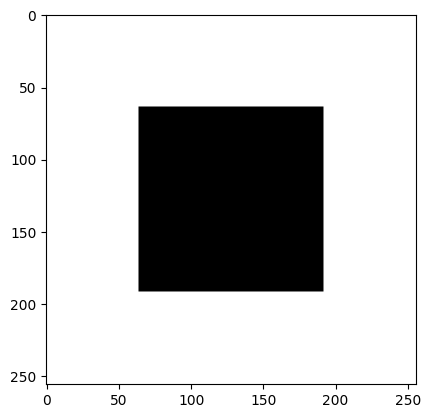

In [112]:
pyplot.imshow(qImage, cmap="gray")
pyplot.show()

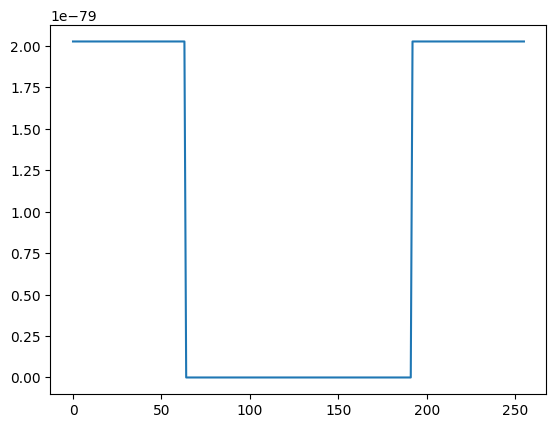

In [113]:
plotLineH(qImage, 128)

In [106]:
# Get Number of Photoms

nSI= N0*size*size
print(f'Number of Photons (From the source): {nSI:d}')

nQI= getNumberPhotons(qImage)
print(nQI)
print(f'Number of Photons (Quantum image): {nQI:d}')

assert nSI > nQI, "Something wrong happens"

Number of Photons (From the source): 16384000
9.964990032392736e-75


ValueError: Unknown format code 'd' for object of type 'float'